In [2]:
from keras.datasets import imdb
import numpy as np

# save np.load
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

# call load_data with allow_pickle implicitly set to true
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# restore np.load for future normal usage
np.load = np_load_old

C:\Users\diddy\Anaconda3\lib\site-packages\keras\datasets\imdb.py:101: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\diddy\Anaconda3\lib\site-packages\keras\datasets\imdb.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [4]:
max([max(sequence) for sequence in train_data])

9999

In [5]:
#one-hot-encoding
def vectorize_sequences(sequences, dimension=10000):
    result = np.zeros((len(sequences), dimension))
    for i, sequences in enumerate(sequences):
        result[i, sequences] = 1.
    return result

In [6]:
#encode
X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)

In [8]:
#target
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [ ]:
Dense(16, activation='relu')

In [11]:
from keras import models
from keras import layers

#define model Sequential
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

#最適化: rmsprop
#損失関数: 交差エントロピー
#監視指標: accuracy
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [12]:
X_train.shape

(25000, 10000)

In [14]:
#make validation_data (size=10000)
X_val = X_train[:10000]
partial_X_train = X_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [16]:
#learning
history = model.fit(partial_X_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(X_val, y_val))


Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 30s 2ms/step - loss: 0.5413 - acc: 0.7752 - val_loss: 0.4091 - val_acc: 0.8585
Epoch 2/20
15000/15000 [==============================] - 13s 867us/step - loss: 0.3248 - acc: 0.8950 - val_loss: 0.3288 - val_acc: 0.8722
Epoch 3/20
15000/15000 [==============================] - 2s 150us/step - loss: 0.2371 - acc: 0.9232 - val_loss: 0.2859 - val_acc: 0.8878
Epoch 4/20
15000/15000 [==============================] - 2s 151us/step - loss: 0.1860 - acc: 0.9392 - val_loss: 0.2737 - val_acc: 0.8907
Epoch 5/20
15000/15000 [==============================] - 2s 145us/step - loss: 0.1542 - acc: 0.9504 - val_loss: 0.2987 - val_acc: 0.8816
Epoch 6/20
15000/15000 [==============================] - 2s 160us/step - loss: 0.1246 - acc: 0.9622 - val_loss: 0.2866 - val_acc: 0.8870
Epoch 7/20
15000/15000 [==============================] - 2s 144us/step - loss: 0.1093 - acc: 0.9656 - val_loss: 0.3029 -

In [17]:
#see History Object's key (学習に関する全てのlogが含まれる(上の学習過程のそれぞれの値))
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans.


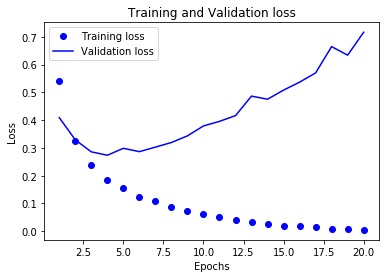

In [19]:
import matplotlib.pyplot as plt

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

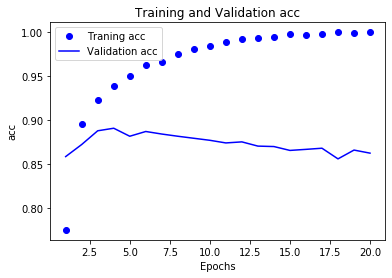

In [22]:
#過学習を起こしている

acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Traning acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation acc')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()
plt.show()
#過学習を起こしている

In [23]:
#過学習の結果から, 4エポックで止めてみる
model.fit(X_train, y_train, epochs=4, batch_size=512)
result = model.evaluate(X_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 3s 103us/step - loss: 0.2154 - acc: 0.9468
Epoch 2/4
25000/25000 [==============================] - 2s 92us/step - loss: 0.1337 - acc: 0.9596
Epoch 3/4
25000/25000 [==============================] - 2s 97us/step - loss: 0.1023 - acc: 0.9690
Epoch 4/4
25000/25000 [==============================] - 15s 612us/step


In [24]:
#loss, accuracy
result

[0.521260697748661, 0.85584]

In [27]:
#テストデータで試す(出力はシグモイド関数なので確率)
model.predict(X_test)

array([[0.02927214],
       [1.        ],
       [0.9994662 ],
       ...,
       [0.16378117],
       [0.10052595],
       [0.96903086]], dtype=float32)

In [51]:
#Hidden Layerを一つ増やしてみる(or 減らしてみる)
#unitの数を増やしてみる(or 減らしてみる)
#reluからtanhにしてみる
#binary_crossentropyからmseにしてみる

#define model Sequential
model = models.Sequential()
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(16, activation='tanh'))
#model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

#最適化: rmsprop
#損失関数: 交差エントロピー
#監視指標: accuracy
model.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])

In [52]:
#learning
history = model.fit(partial_X_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(X_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 183us/step - loss: 0.1567 - acc: 0.8033 - val_loss: 0.1106 - val_acc: 0.8676
Epoch 2/20
15000/15000 [==============================] - 2s 166us/step - loss: 0.0795 - acc: 0.9088 - val_loss: 0.0865 - val_acc: 0.8893
Epoch 3/20
15000/15000 [==============================] - 2s 142us/step - loss: 0.0541 - acc: 0.9382 - val_loss: 0.0827 - val_acc: 0.8892
Epoch 4/20
15000/15000 [==============================] - 2s 150us/step - loss: 0.0412 - acc: 0.9525 - val_loss: 0.0885 - val_acc: 0.8782
Epoch 5/20
15000/15000 [==============================] - 2s 140us/step - loss: 0.0303 - acc: 0.9661 - val_loss: 0.0961 - val_acc: 0.8728
Epoch 6/20
15000/15000 [==============================] - 2s 142us/step - loss: 0.0238 - acc: 0.9735 - val_loss: 0.0948 - val_acc: 0.8765
Epoch 7/20
15000/15000 [==============================] - 2s 149us/step - loss: 0.0195 - acc: 0.9782 - val_loss: 0.0983 - 

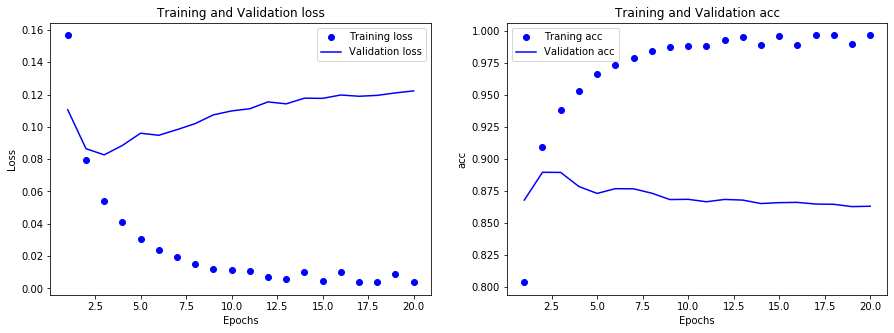

In [53]:
import matplotlib.pyplot as plt

history_dict = history.history
history_dict.keys()

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

fig = plt.figure(figsize=(15, 5))

fig.add_subplot(1, 2, 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

fig.add_subplot(1, 2, 2)
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Traning acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation acc')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()
plt.show()
#過学習を起こしている